In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
path1 = "weights/transformer_n_blocks_6_n_heads_8_d_model_512_dropout_0.1.pt"
path2 = "weights/transformer_n_blocks_6_n_heads_8_d_model_640_dropout_0.2.pt"
path3 = "weights/transformer_n_blocks_8_n_heads_10_d_model_640_dropout_0.1.pt"

params1 = torch.load(path1)
params2 = torch.load(path2)
params3 = torch.load(path3)

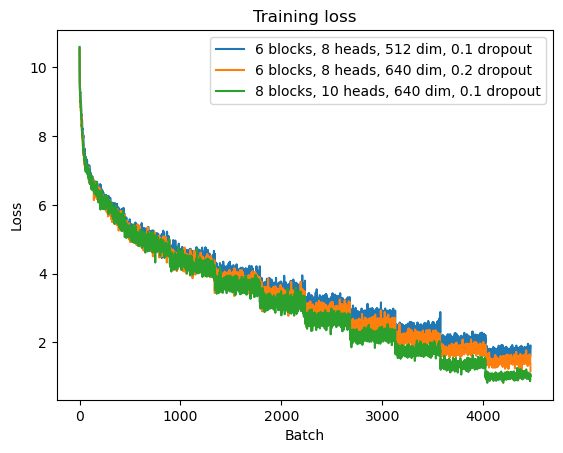

In [3]:
train1_losses = params1["train_losses"]
train2_losses = params2["train_losses"]
train3_losses = params3["train_losses"]

plt.plot(train1_losses, label="6 blocks, 8 heads, 512 dim, 0.1 dropout")
plt.plot(train2_losses, label="6 blocks, 8 heads, 640 dim, 0.2 dropout")
plt.plot(train3_losses, label="8 blocks, 10 heads, 640 dim, 0.1 dropout")
plt.legend()
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.show()

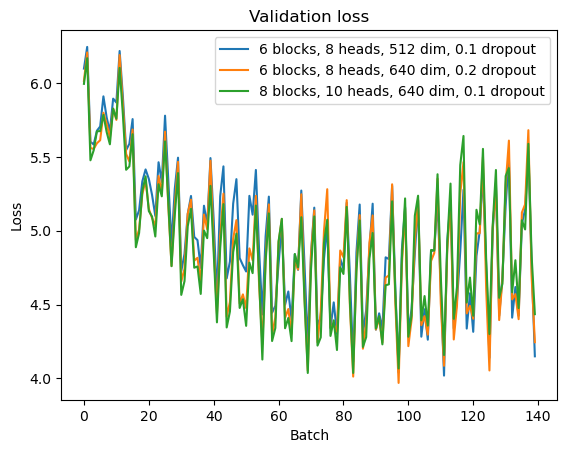

In [4]:
dev1_losses = params1["dev_losses"]
dev2_losses = params2["dev_losses"]
dev3_losses = params3["dev_losses"]

plt.plot(dev1_losses, label="6 blocks, 8 heads, 512 dim, 0.1 dropout")
plt.plot(dev2_losses, label="6 blocks, 8 heads, 640 dim, 0.2 dropout")
plt.plot(dev3_losses, label="8 blocks, 10 heads, 640 dim, 0.1 dropout")
plt.legend()
plt.title("Validation loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.show()

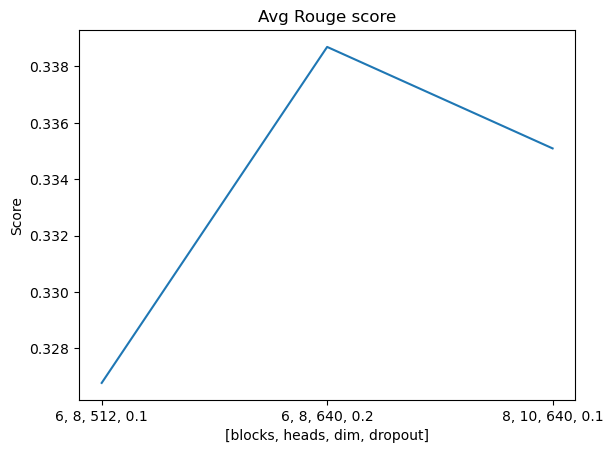

In [8]:
bleu1 = torch.tensor(params1["dev_bleu"]).mean().item()
bleu2 = torch.tensor(params2["dev_bleu"]).mean().item()
bleu3 = torch.tensor(params3["dev_bleu"]).mean().item()

rouge1 = torch.tensor(params1["dev_rouge"]).mean().item()
rouge2 = torch.tensor(params2["dev_rouge"]).mean().item()
rouge3 = torch.tensor(params3["dev_rouge"]).mean().item()

# plt.plot([bleu1, bleu2, bleu3])
plt.plot([rouge1, rouge2, rouge3])

plt.xticks([0, 1, 2], ["6, 8, 512, 0.1", "6, 8, 640, 0.2", "8, 10, 640, 0.1"])
plt.title("Avg Rouge score")
plt.xlabel("[blocks, heads, dim, dropout]")
plt.ylabel("Score")
plt.show()